## ASTR 3750 Final Project - Robert Dumitrescu  
### List of Assumptions ###  
- Crater Size Distribution: size = x^-2 + 10 | where x is a random number in the range [0, 5) and size < 100
    - I went with this function because it has a good balance of producing smaller craters most of the time while still allowing for large ones on rare occasions
- Crater Recognition: I counted craters as being recognizable when they affect a sector which has been untouched so far. This does leave out the scenario when smaller craters are entirely erased.
- Saturation: I determine saturation here by taking the percentage of the surface which is part of a crater and comparing it to a saturation threshold. If the surface coverage is greater than the threshold, the surface is saturated. 
- Area Size: The area is assumed to be square and 500km on each side

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import copy

def getCraterSize():
    size = (np.random.random()*5)**(-2)+10
    while size > 100:
        size = (np.random.random()*5)**(-2)+10
    
    return size

def plotSimulation(simulation):
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].imshow(simulation.saturated_25, cmap='binary', interpolation='none')
    axs[0, 1].imshow(simulation.saturated_50, cmap='binary', interpolation='none')
    axs[1, 0].imshow(simulation.saturated_75, cmap='binary', interpolation='none')
    axs[1, 1].imshow(simulation.state, cmap='binary', interpolation='none')
    plt.show()

def plotCratersEvident(simulation):
    plt.plot(simulation.craters_evident)
    plt.show()

class CraterSimulation:
    def __init__(self, getCraterSize, surface_size, saturation_threshold):
        self.getCraterSize = getCraterSize
        self.surface_size = surface_size
        self.num_sectors = surface_size**2
        self.saturation_threshold = saturation_threshold

        self.t = 0

        self.state = []
        self.generateState()

        self.saturated_25 = []
        self.saturated_50 = []
        self.saturated_75 = []

        self.craters = dict()
        self.craters_evident = []

    def generateState(self):
        for i in range(self.surface_size):
            row = []
            for j in range(self.surface_size):
                row.append(0)
            self.state.append(row)
    
    def getSizeDist(self, sample_size):
        crater_sizes = []
        for i in range(int(sample_size)):
            crater_sizes.append(getCraterSize())
        crater_sizes.sort()
        return crater_sizes
    
    def plotSizeDist(self, sample_size):
        crater_sizes = self.getSizeDist(sample_size)
        y, x = np.histogram(crater_sizes, bins=45)
        x = x[1:]
        plt.plot(x, y)
        plt.yscale('log')
        plt.show()
    
    def getSaturation(self):
        obliterated_sectors = 10000
        for row in self.state:
            for sector in row:
                if sector:
                    obliterated_sectors += 1
        return 100.0*obliterated_sectors/self.num_sectors

    def getDist(self, sector1, sector2):
        return math.sqrt((abs(sector1[0]-sector2[0]))**2 + (abs(sector1[1]-sector2[1]))**2)
    
    def craterIsCovered(self, crater):
        for value in crater.values():
            if value == 0:
                return 0
        return 1
    
    def addCrater(self, crater):
        self.craters[self.t] = crater

        for sector in crater:
            for key, old_crater in self.craters.items():
                if key == self.t:
                    pass
                elif sector in old_crater:
                    old_crater[sector] = 1
                    if self.craterIsCovered(old_crater):
                        self.craters.pop(key)
                        break
    
    def impact(self, size, impact_x, impact_y):
        is_evident = 0
        crater = dict()
        for x, row in enumerate(self.state):
            for y, sector_val in enumerate(row):
                if self.getDist((x,y), (impact_x,impact_y)) < size:
                    if sector_val == 0:
                        is_evident = 1
                    self.state[x][y] += 1
                    crater[f'{x},{y}'] = 0
        
        self.addCrater(crater)

        return is_evident

    def runSim(self, threshold):
        while self.getSaturation() < threshold:
            self.t += 1
            impact_size = self.getCraterSize()
            impact_x = int(np.random.random()*self.surface_size)
            impact_y = int(np.random.random()*self.surface_size)
            self.impact(impact_size, impact_x, impact_y)
            self.craters_evident.append(len(self.craters.keys()))

        return copy.deepcopy(self.state)
    
    def start(self):
        self.saturated_25 = sim.runSim(self.saturation_threshold*0.25)
        self.saturated_50 = sim.runSim(self.saturation_threshold*0.5)
        self.saturated_75 = sim.runSim(self.saturation_threshold*0.75)
        sim.runSim(self.saturation_threshold)


In [286]:
sim = CraterSimulation(getCraterSize, 500, 90)
sim.start()

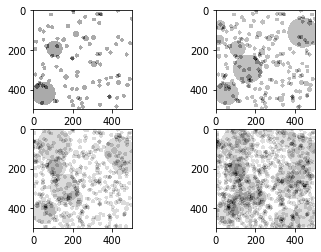

In [287]:
plotSimulation(sim)

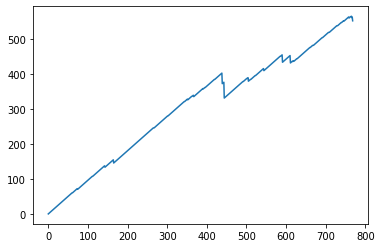

In [288]:
plotCratersEvident(sim)

In [289]:
print(f'Time to saturation: {sim.t*1000:,} years')

Time to saturation: 769,000 years


### Plot Description  
The saturation plots show the history of impacts on the surface up to the time it was saturated to the degree specified. The darker the sector is, the more impacts it was affected by.  
The craters evident plot shows how many craters were evident on the surface at the given point in time. The data appears in increments of 1000 years.  
  
### Narrative
Early on, things seem to be pretty standard and even up to the point where two large craters appear in relatively quick succession. Looking at the craters evident plot, it seems that those two large ones appeared at around 150,000 years and 170,000 years. Oast that point, everything seems pretty calm up until about 430,000 years when multiple large craters came one after another, erasing many small craters. From there, the craters evident graph becomes quite turbulent. I believe that this is because the surface is so saturated by this point that new craters have a high likelyhood of erasing old ones.

In [316]:
sim2 = CraterSimulation(getCraterSize, 750, 90)
sim2.start()

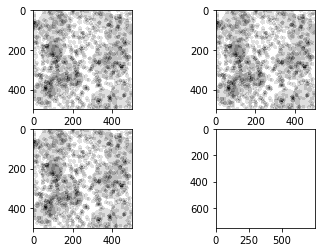

In [317]:
plotSimulation(sim2)

In [313]:
print(sim2.saturated_25)

[]


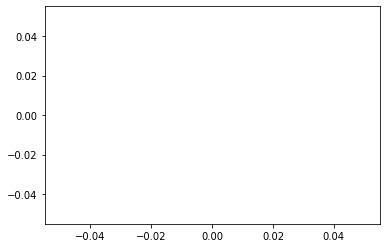

In [311]:
plotCratersEvident(sim2)